<!--Información del curso-->
![Imagen](https://docs.google.com/uc?export=download&id=15xHjlq4eim3Ryn3bfm5mfyj_LDDyiu1c)


**Integrantes:**

Sierra Delgado Carlos Fernando

Ortega María Guadalupe

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio: Delitos en Estados Unidos </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/crimenesUSA.png" align="middle" style="width:550px;"/></td>
<td>
    
En este proyecto se analizaran datos de arrestos en Estados Unidos en el año 1973 por cada 100,000 habitantes. También proporciona el porcentaje de la población que vive en áreas urbanas dentro del estado.    

Las variables del archivo de datos son:
    
'US_state'  :  Entidad de Estados Unidos
    
'UrbanPop' : Porcentaje de población urbana
    
'Murder' : Asesinato
    
'Assault' : Asalto
    
'Rape' :   Abuso   

    
<br>
</td>
</tr>
</table>

# 1. Importar librerías generales

In [169]:
#Libreria para cargar nuestro drive
from google.colab import drive
#Cargamos nuestro drive en nuestro notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
!ls "/content/drive/My Drive/Ciencia de datos/CD_17_ML_DelitosMexico"

CD_17_DelitosUSA.ipynb	datos  Ejemplo_KMeans.ipynb  figuras  Untitled0.ipynb


In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

# 2. Obtención de datos

In [294]:
# Ubicación de los datos en github
#url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv'
#df = pd.read_csv(url)

df = pd.read_csv('/content/drive/My Drive/Ciencia de datos/CD_17_ML_DelitosMexico/datos/USArrests.csv')

In [295]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [296]:
#renombramos la primera columna
df = df.rename(columns={'Unnamed: 0': 'US_state'})

In [297]:
df = df[['US_state', 'UrbanPop', 'Murder', 'Assault','Rape']]

In [298]:
df.head()

,US_state,UrbanPop,Murder,Assault,Rape
0,Alabama,58,13.2,236,21.2
1,Alaska,48,10.0,263,44.5
2,Arizona,80,8.1,294,31.0
3,Arkansas,50,8.8,190,19.5
4,California,91,9.0,276,40.6


# 3. Análisis Exploratorio

In [299]:
#Principales parámetros estadísticos
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


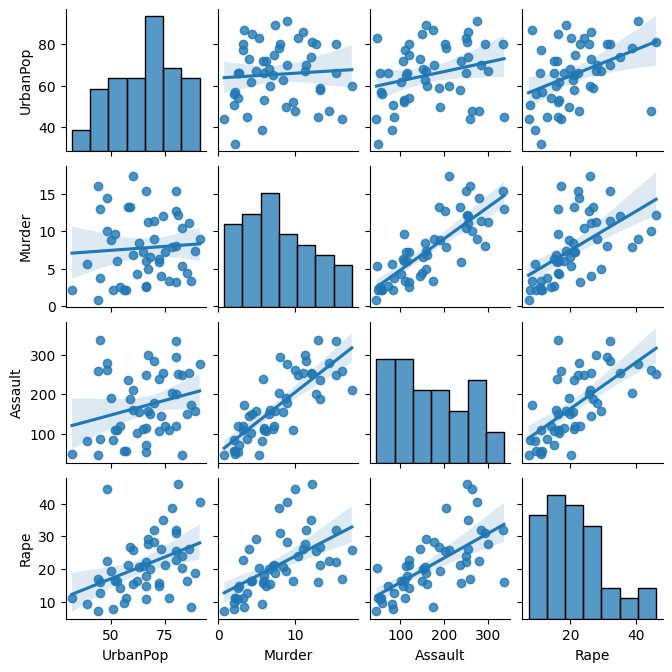

In [300]:
# Correlación lineal de variables
sns.pairplot(df, kind="reg",  height=1.7 , aspect=1)

# 4. Normalización de datos

In [301]:
#Selección de caracteristicas para llevar a cabo el agrupamiento
features = ['Murder','Assault','UrbanPop','Rape']

In [302]:
#Re-esalamiento de variables
from sklearn import preprocessing
df_standardized = preprocessing.scale(df[features])

In [303]:
df_standardized

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

(array([5., 8., 5., 9., 6., 3., 5., 4., 3., 2.]),
 array([-1.62069341, -1.23569755, -0.85070169, -0.46570583, -0.08070998,
         0.30428588,  0.68928174,  1.0742776 ,  1.45927346,  1.84426932,
         2.22926518]),
 <BarContainer object of 10 artists>)

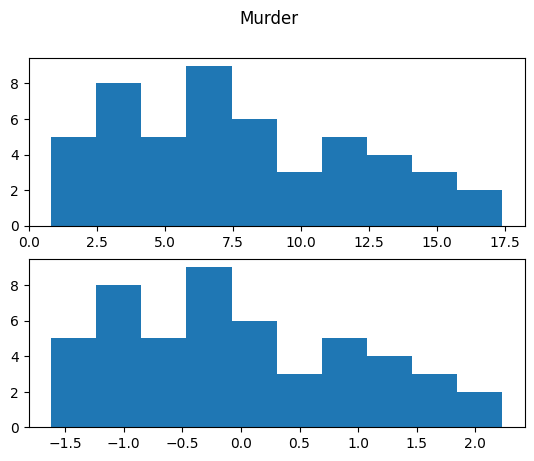

In [304]:
#Comparación antes y despues de la normalización (re-escalamiento)
Murder_list=df_standardized[:,:1].flatten()
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Murder')
ax1.hist(df['Murder'])
ax2.hist( Murder_list)

In [305]:
# Data frame que servirá para la predicción de grupos
df_standardized = pd.DataFrame(df_standardized)

In [306]:
df_standardized.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


# 5. Separación de los datos en grupos

In [307]:
# Llamamos al algoritmo y lo ejecutamos  para 1 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 1, init = 'k-means++',n_init='auto', random_state = 42)
kmeans.fit(df_standardized)
# Valor de WCSS
kmeans.inertia_

200.00000000000003

# 6. Método del codo

In [308]:
# Se obtienen los diferentes valores de WCSS
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init='auto', random_state = 42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

In [309]:
wcss

[200.00000000000003,
 104.96163315756871,
 84.30010772989172,
 57.55425863091105,
 52.02451536103697,
 45.49769486745139,
 42.996574939853204,
 35.69587706333374,
 33.788262478610406,
 30.323525218359457,
 28.86502108857791,
 26.750252132081567]

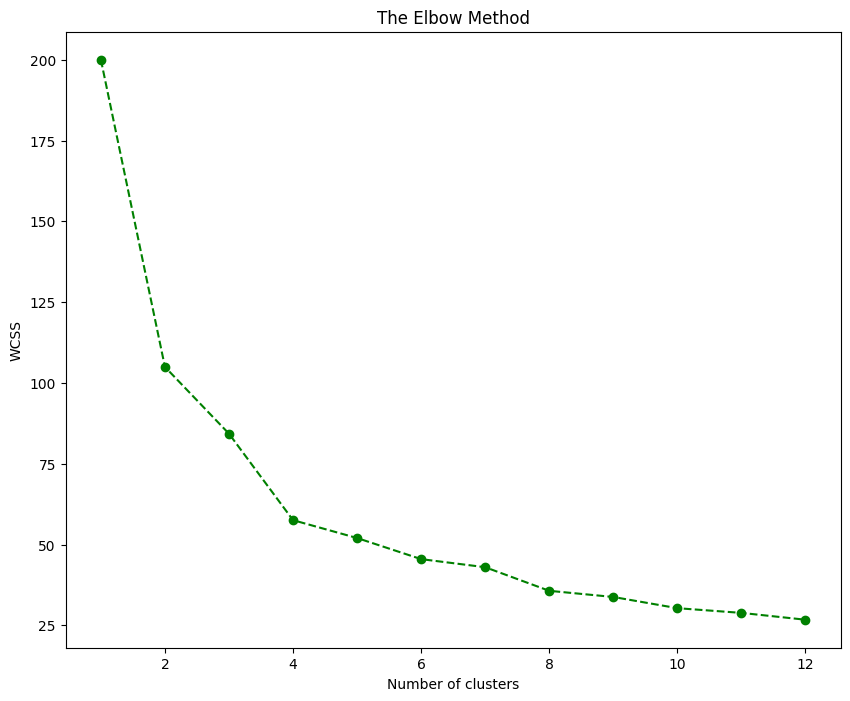

In [310]:
# Grafica de los valores de WCSS
plt.figure(figsize=(10, 8))
plt.plot(range(1, 13), wcss,"go--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 7. Análisis de resultados

In [314]:
# Predicción de etiquetas
kmeans = KMeans(n_clusters = 4, init = 'k-means++',n_init='auto', random_state = 42)
y_kmeans = kmeans.fit_predict(df_standardized)
y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [315]:
# Cambiamos los valores de los grupos para comenzar en 1 y lo agregamos al dataframe original
df['cluster'] = y_kmeans + 1
df.head()

,US_state,UrbanPop,Murder,Assault,Rape,cluster
0,Alabama,58,13.2,236,21.2,2
1,Alaska,48,10.0,263,44.5,3
2,Arizona,80,8.1,294,31.0,3
3,Arkansas,50,8.8,190,19.5,2
4,California,91,9.0,276,40.6,3


<Axes: xlabel='Murder', ylabel='Assault'>

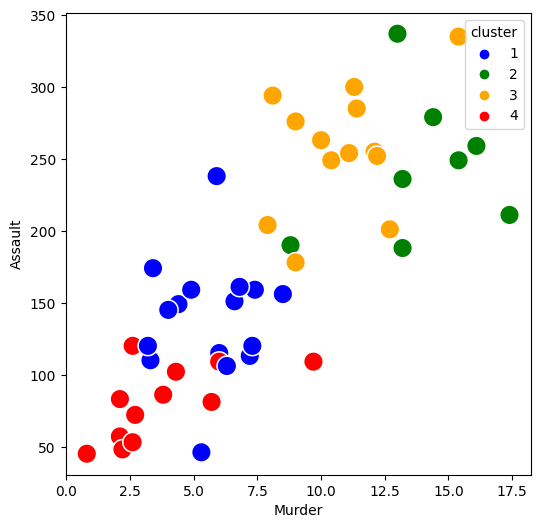

In [316]:
# Observamos la distribución de grupos en un par de variables
plt.figure(figsize=(6,6))
sns.scatterplot(x='Murder', y = 'Assault', hue='cluster',
                palette=['blue','green','orange','red'] , data=df, s=200)

<Figure size 500x500 with 0 Axes>

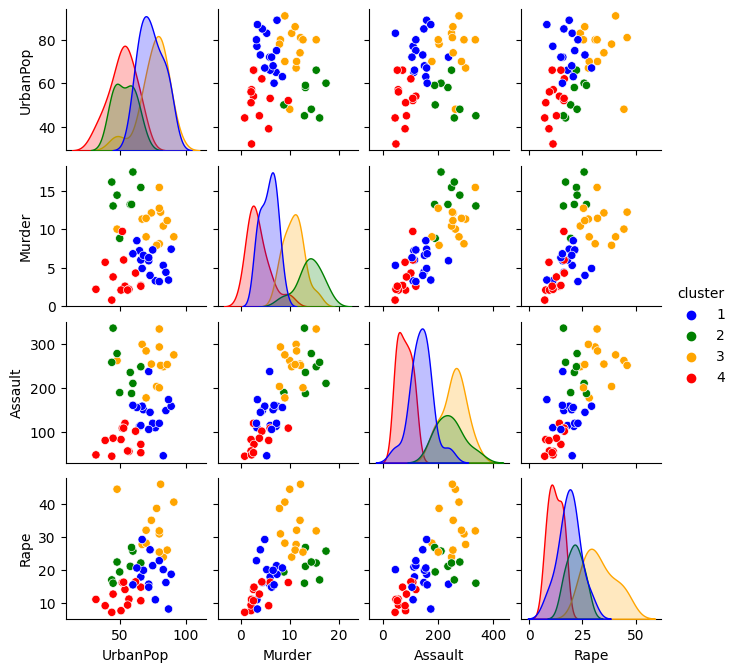

In [269]:
#Comparando a pares las variables
fig = plt.figure(figsize=(5, 5))
sns.pairplot(df, hue="cluster",  palette=['blue','green','orange','red'],height=1.7 , aspect=1)
plt.show()

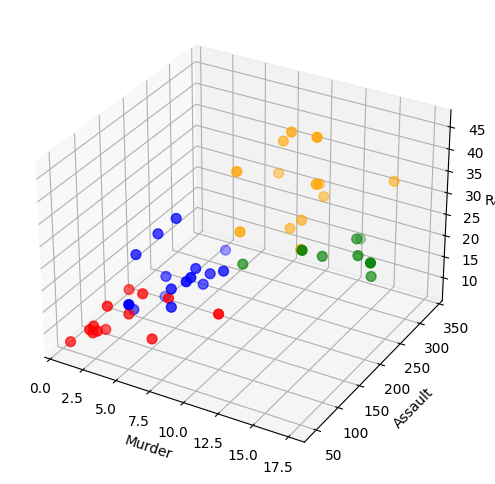

In [270]:
#Comparando los tres tipos de delitos

#%matplotlib notebook
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure(figsize=(8, 6))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

x = df['Murder']
y = df['Assault']
z = df['Rape']
colors = df['cluster']
cmap = matplotlib.colors.ListedColormap(['blue','green','orange','red'])
g=ax.scatter(x, y, z, s=50,  c =  colors  , cmap=cmap  )

ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
#ax.view_init(elev=20, azim=35, roll=0)


plt.show()

In [271]:
# Se define un dataframe para mostrar la informacion en un mapa
df_map  = df
df_map.head()

,US_state,UrbanPop,Murder,Assault,Rape,cluster
0,Alabama,58,13.2,236,21.2,2
1,Alaska,48,10.0,263,44.5,3
2,Arizona,80,8.1,294,31.0,3
3,Arkansas,50,8.8,190,19.5,2
4,California,91,9.0,276,40.6,3


In [272]:
# Información geográfica de los Estados Unidos
estados_geo = '/content/drive/My Drive/Ciencia de datos/CD_17_ML_DelitosMexico/datos/estados_usa.json'

In [273]:
# Librería Python que permite crear mapas interactivos
import folium
map = folium.Map(location=[53,-102], tiles='cartodbpositron',zoom_start=2.5)

In [274]:
folium.Choropleth(geo_data=estados_geo, data=df_map, # geo_path=country_geo, data=plot_data,
             columns=['US_state', 'cluster'],
             key_on='feature.properties.name',
             fill_color='Paired', fill_opacity=0.9, line_opacity=0.9
                 ).add_to(map)
map

## Observaciones

<img src="figuras/analisis_datos.jpg" align="middle" style="width:850px;"/></td>

Grupo 1(azul): La región del Sureste  los asesinatos tienen altos índices de asesinatos.

Grupo 2(verde): Se encuentra en el Centro y tiene valores promedio.

Grupo 3(anaranjado-rosa): Se encuentra al Norte y se destaca por la tasa mínima de delitos.

Grupo 4(rojo): Los estados del Suroeste  tienen los mas altos índices de asaltos y violaciones.



# Método de silueta


In [321]:
kmeans2_sil= [KMeans(n_clusters=i, random_state=42, init='k-means++', n_init='auto').fit(df_standardized) for i in range(1,13)]

sil_values = [ silhouette_score(df_standardized, model.labels_, random_state=42)
                    for model in kmeans2_sil[1:]
                   ]

sil_values = np.array( sil_values )
sil_values

array([0.40848903, 0.35656159, 0.33968891, 0.31898887, 0.2649947 ,
       0.22618932, 0.24606153, 0.23577336, 0.23231903, 0.22273748,
       0.20751634])

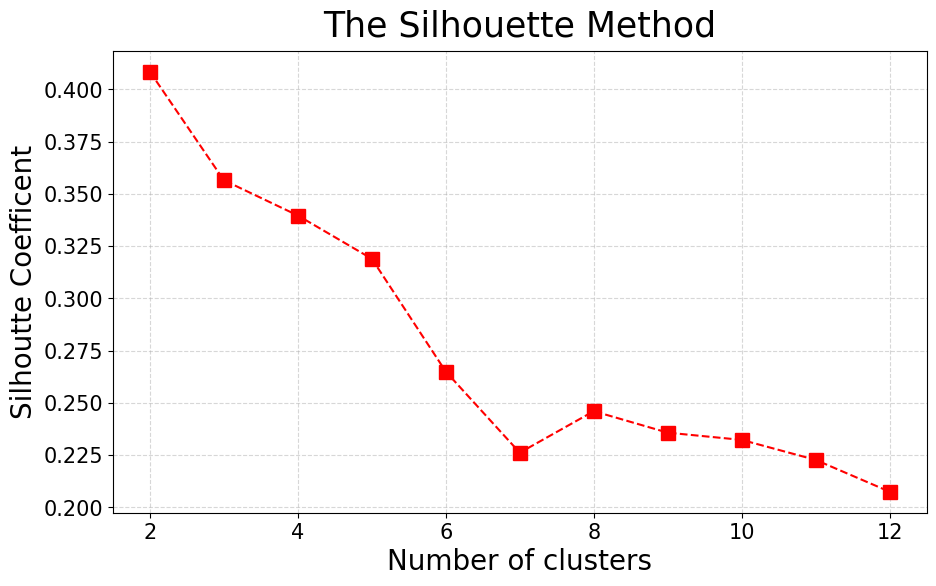

In [322]:
plt.figure( figsize=(10.5,6))

plt.plot(range(2, 13), sil_values,
         linestyle = '--', linewidth = 1.5,
         marker = 's', markersize = 10,
         color = 'red' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

# TAREA

In [201]:
#agregar y confirmar la cantidad de clusters por silueta
#usar la información paz

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df2 = pd.read_csv('/content/drive/My Drive/Ciencia de datos/CD_17_ML_DelitosMexico/datos/indice_paz_mex_impacto-economico_2020.csv', encoding='latin-1')

In [204]:
df2.head(15)

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib
0,AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,"36,158",14.5
1,BAJA_CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,"71,413",31.5
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.000,1.496,28.8,"35,761",13.4
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,"21,543",2.2
4,CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,"13,742",17.8
5,CHIHUAHUA,5.000,2.641,4.894,3.290,1.785,233.9,"61,538",29.0
6,COAHUILA,1.495,2.274,1.312,3.204,1.766,59.0,"18,344",6.2
7,COLIMA,5.000,3.344,5.000,4.224,1.418,61.2,"77,957",38.4
8,DURANGO,1.649,2.463,1.455,2.904,2.196,38.6,"20,650",11.5
9,GUANAJUATO,5.000,3.313,5.000,2.657,1.280,420.6,"67,536",41.9


In [205]:
df2.dtypes

Estados                                          object
Homicidio                                       float64
Delitos_con_violencia                           float64
Delitos_con_armas_fuego                         float64
Delincuencia_organizada                         float64
Carcel_Sin_sentencia                            float64
Impacto_economico_de_la_violencia               float64
Impacto_economico_per_capita_de_la_violencia     object
porcen_pib                                      float64
dtype: object

In [206]:
df2['Impacto_economico_per_capita_de_la_violencia'] = [num.replace(',', '') for num in df2['Impacto_economico_per_capita_de_la_violencia']]
df2.head()

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib
0,AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,36158,14.5
1,BAJA_CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,71413,31.5
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.000,1.496,28.8,35761,13.4
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,21543,2.2
4,CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,13742,17.8


In [207]:
df2['Impacto_economico_per_capita_de_la_violencia'].astype(float)

0     36158.0
1     71413.0
2     35761.0
3     21543.0
4     13742.0
5     61538.0
6     18344.0
7     77957.0
8     20650.0
9     67536.0
10    37922.0
11    25302.0
12    38466.0
13    33836.0
14    44355.0
15    50321.0
16    52101.0
17    22219.0
18    27681.0
19    31565.0
20    31227.0
21    43574.0
22    46871.0
23    32053.0
24    32089.0
25    48117.0
26    33133.0
27    29404.0
28    20310.0
29    23060.0
30    11146.0
31    57953.0
Name: Impacto_economico_per_capita_de_la_violencia, dtype: float64

In [208]:
df2.columns

Index(['Estados', 'Homicidio', 'Delitos_con_violencia',
       'Delitos_con_armas_fuego', 'Delincuencia_organizada',
       'Carcel_Sin_sentencia', 'Impacto_economico_de_la_violencia',
       'Impacto_economico_per_capita_de_la_violencia', 'porcen_pib'],
      dtype='object')

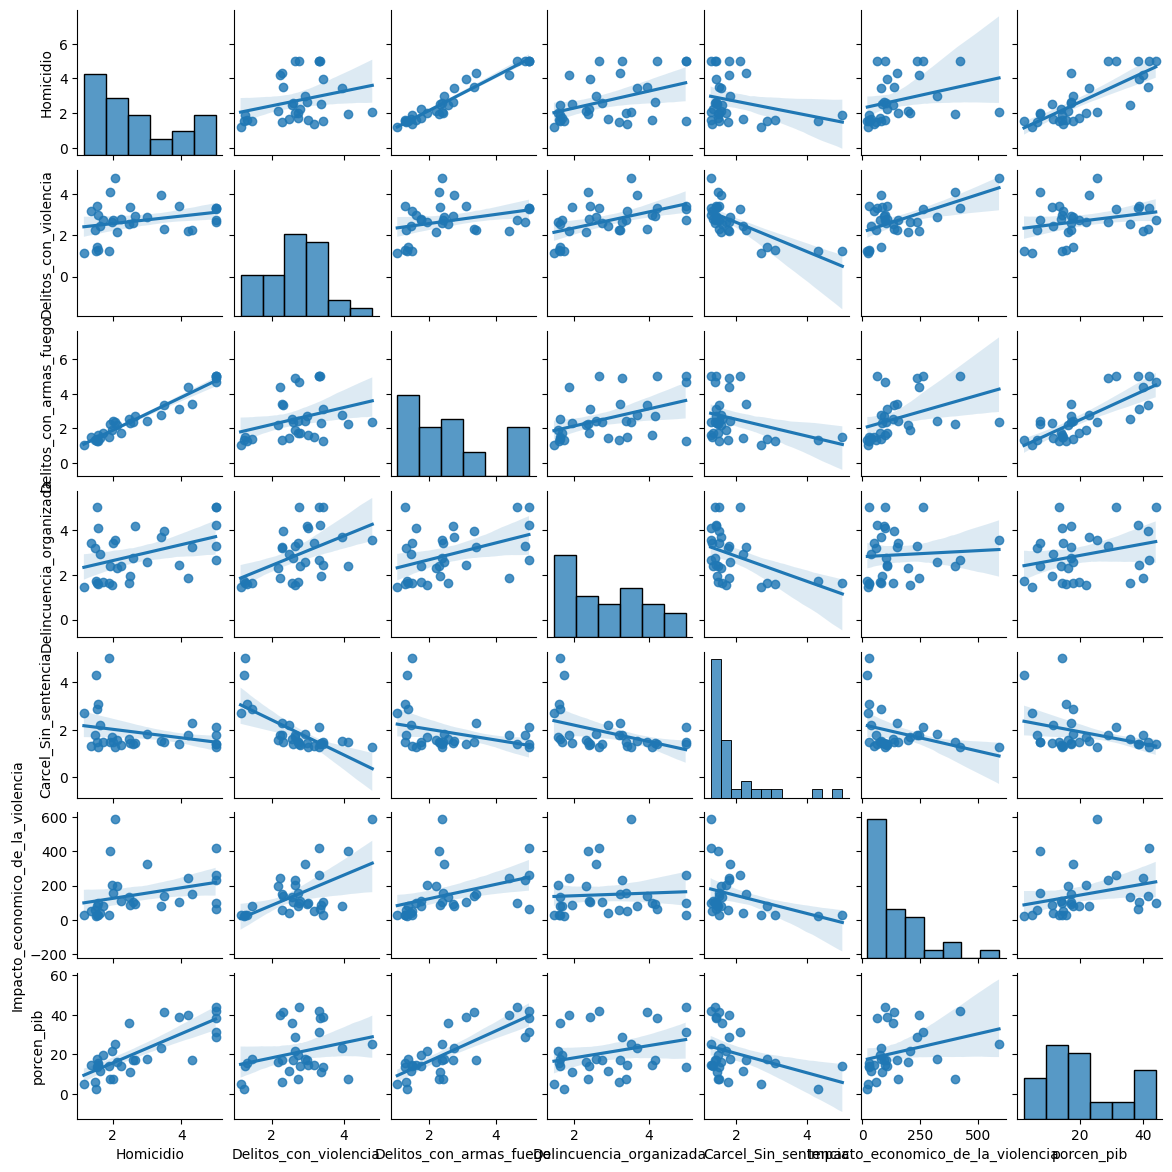

In [209]:
sns.pairplot(df2, kind="reg",  height=1.7 , aspect=1)

In [210]:
#homicidio con deitos con armas de fuego

In [211]:
features = ['Homicidio', 'Delitos_con_violencia',
       'Delitos_con_armas_fuego', 'Delincuencia_organizada',
       'Carcel_Sin_sentencia', 'Impacto_economico_de_la_violencia',
       'Impacto_economico_per_capita_de_la_violencia', 'porcen_pib']

In [212]:
from sklearn import preprocessing
df2_standardized = preprocessing.scale(df2[features])

In [213]:
df2_standardized

array([[-1.06724887e+00,  5.53283611e-01, -8.75468305e-01,
         4.98800656e-01, -6.92702647e-01, -7.33802550e-01,
        -7.62228423e-02, -5.40888350e-01],
       [ 1.79847363e+00,  7.07991648e-01,  1.95465401e+00,
         1.94985711e+00,  2.53284131e-01,  8.63323975e-01,
         2.05803944e+00,  8.85399883e-01],
       [-9.20491057e-01,  8.45909665e-01, -1.04962968e+00,
         1.94985711e+00, -4.70048225e-01, -9.11431933e-01,
        -1.00256373e-01, -6.33177589e-01],
       [-9.37060488e-01, -1.77813052e+00, -9.92382190e-01,
        -1.06926162e+00,  2.82971387e+00, -9.66796935e-01,
        -9.60983679e-01, -1.57284984e+00],
       [-9.28381262e-01, -1.51308807e+00, -9.70612018e-01,
        -1.15586435e+00,  1.15332635e+00, -5.27721708e-01,
        -1.43323953e+00, -2.64020634e-01],
       [ 1.79847363e+00, -7.75414070e-02,  1.86918593e+00,
         3.74424389e-01, -1.29587230e-01,  6.65701675e-01,
         1.46022807e+00,  6.75651613e-01],
       [-9.67043267e-01, -5.176797

(array([5., 7., 5., 4., 1., 1., 1., 2., 1., 5.]),
 array([-1.225842  , -0.92341043, -0.62097887, -0.31854731, -0.01611574,
         0.28631582,  0.58874738,  0.89117894,  1.19361051,  1.49604207,
         1.79847363]),
 <BarContainer object of 10 artists>)

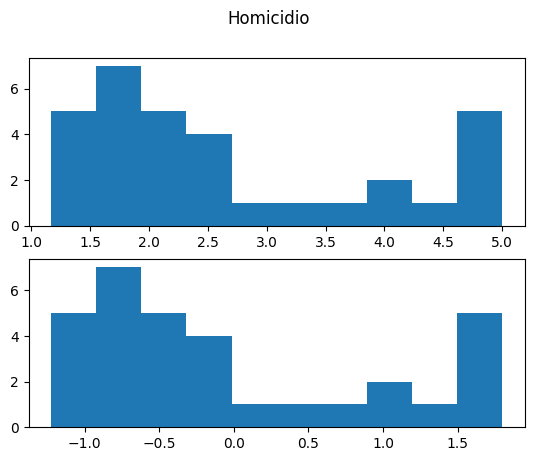

In [214]:
Lista_Homicidios=df2_standardized[:,:1].flatten()
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Homicidio')
ax1.hist(df2['Homicidio'])
ax2.hist(Lista_Homicidios)

In [215]:
df2_standardized = pd.DataFrame(df2_standardized)

In [216]:
df2_standardized.head()

,0,1,2,3,4,5,6,7
0,-1.067249,0.553284,-0.875468,0.498801,-0.692703,-0.733803,-0.076223,-0.540888
1,1.798474,0.707992,1.954654,1.949857,0.253284,0.863324,2.058039,0.885400
2,-0.920491,0.845910,-1.049630,1.949857,-0.470048,-0.911432,-0.100256,-0.633178
3,-0.937060,-1.778131,-0.992382,-1.069262,2.829714,-0.966797,-0.960984,-1.572850
4,-0.928381,-1.513088,-0.970612,-1.155864,1.153326,-0.527722,-1.433240,-0.264021


In [217]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters = 1, init = 'k-means++',n_init='auto', random_state = 42)
kmeans2.fit(df2_standardized)
kmeans2.inertia_

256.00000000000006

In [218]:
wcss2 = []
for i in range(1, 13):
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++',n_init='auto', random_state = 42)
    kmeans2.fit(df2_standardized)
    wcss2.append(kmeans2.inertia_)
wcss2

[256.00000000000006,
 155.8228589552894,
 125.85893542161676,
 82.16480662153174,
 69.29894310326873,
 63.645229604724506,
 58.98298844888881,
 48.00813391729314,
 44.382052260654085,
 41.03932425167993,
 36.30762401153946,
 32.63609868246598]

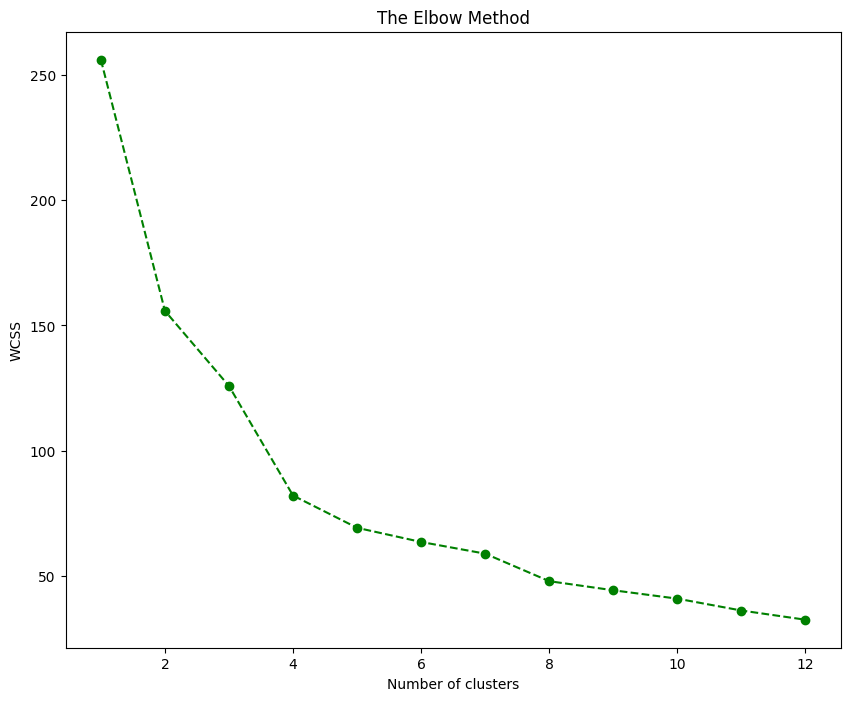

In [283]:
# Grafica de los valores de WCSS
plt.figure(figsize=(10, 8))
plt.plot(range(1, 13), wcss2,"go--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Método de silueta

In [220]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [221]:
silhouette_score(df2_standardized,  kmeans2.labels_)

0.19227362545897747

In [222]:
kmeans22_sil= [KMeans(n_clusters=i, random_state=42, init='k-means++', n_init='auto').fit(df2_standardized) for i in range(1,13)]

sil_values2 = [ silhouette_score(df2_standardized, model.labels_, random_state=42)
                    for model in kmeans22_sil[1:]
                   ]
sil_values2 = np.array( sil_values2 )
sil_values2

array([0.34419735, 0.31673332, 0.35178547, 0.28795714, 0.29187455,
       0.24912215, 0.24363819, 0.23294816, 0.20730168, 0.19539021,
       0.19227363])

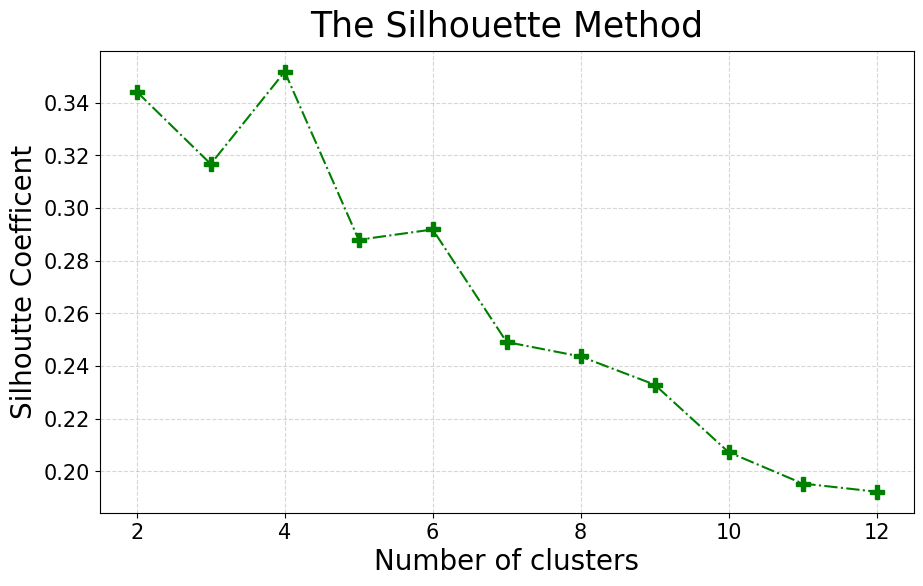

In [326]:
plt.figure( figsize=(10.5,6)       )

plt.plot(range(2, 13), sil_values2,
         linestyle = '-.', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = 'green' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

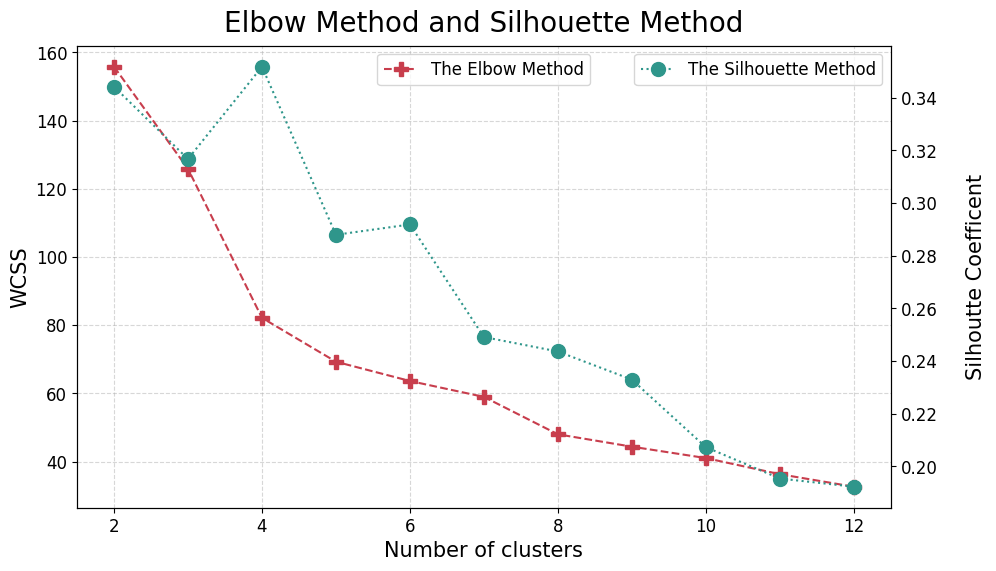

In [284]:
fig , ax1 = plt.subplots( figsize = (10.5,6) )

ax1.set_title('Elbow Method and Silhouette Method', size = 20, pad = 10 )
#--------------- WCSS -----------------
ax1.plot( range(2,13), wcss2[1:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )

#----------- optimal number of clusters -----------------

ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12 )

plt.legend(loc='upper center', prop = {'size':12})


# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2,13), sil_values2,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12 )
plt.legend(loc=0, prop = {'size':12})


ax1.grid(  linestyle = 'dashed', alpha = 0.5 )

plt.show()


In [240]:
kmeans2 = KMeans(n_clusters = 4, init = 'k-means++',n_init='auto', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(df2_standardized)
y_kmeans2

array([0, 1, 0, 3, 3, 1, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 3, 0, 3, 1], dtype=int32)

In [241]:
df2['cluster'] = y_kmeans2 + 1
df2.head()

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib,cluster
0,AGUASCALIENTES,1.368,3.167,1.49,3.425,1.307,51.9,36158,14.5,1
1,BAJA_CALIFORNIA,5.0,3.296,5.0,5.0,2.11,259.6,71413,31.5,2
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.0,1.496,28.8,35761,13.4,1
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,21543,2.2,4
4,CIUDAD_DE_MÉXICO,1.933,4.107,2.285,2.378,1.479,400.0,44355,7.3,4


<Axes: xlabel='Homicidio', ylabel='Delitos_con_armas_fuego'>

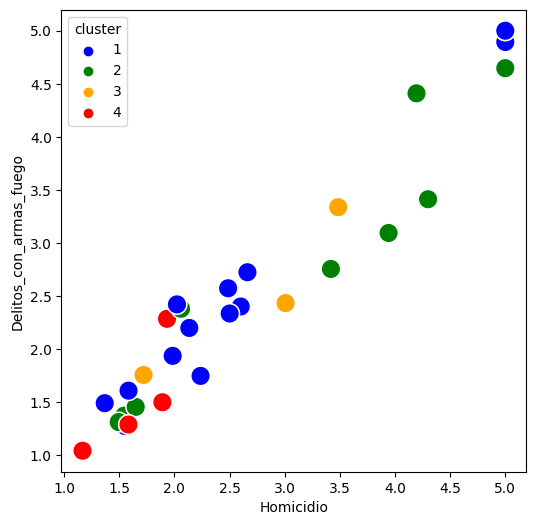

In [242]:
# Observamos la distribución de grupos en un par de variables
plt.figure(figsize=(6,6))
sns.scatterplot(x='Homicidio', y = 'Delitos_con_armas_fuego', hue='cluster',
                palette=['blue','green','orange','red'] , data=df2, s=200)

<Figure size 500x500 with 0 Axes>

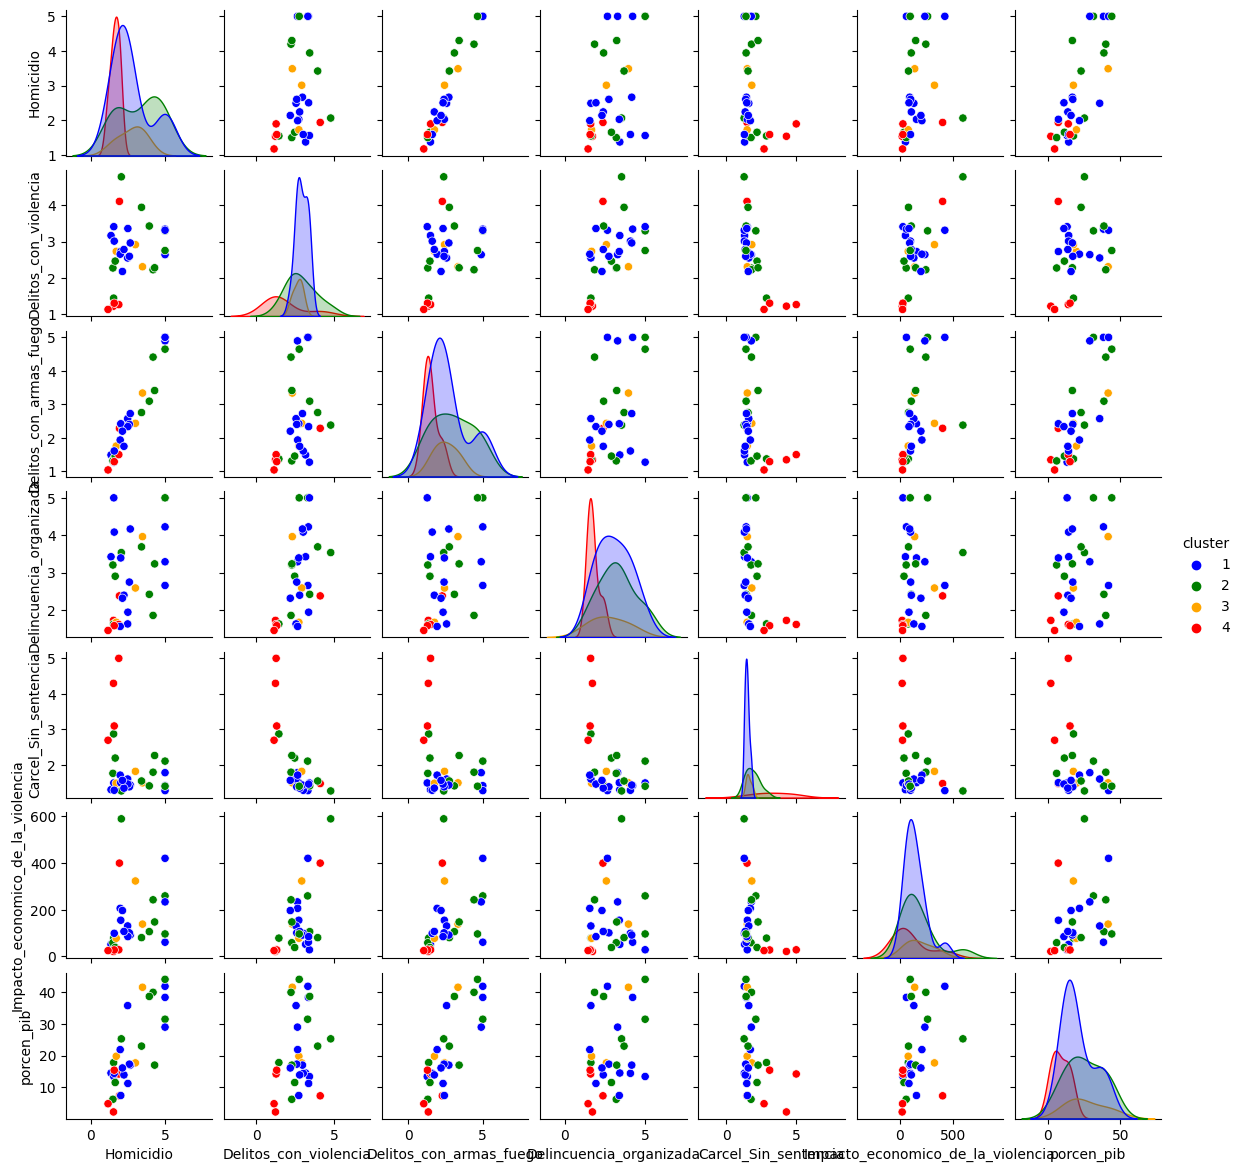

In [243]:
#Comparando a pares las variables
fig = plt.figure(figsize=(5, 5))
sns.pairplot(df2, hue="cluster",  palette=['blue','green','orange','red'],height=1.7 , aspect=1)
plt.show()

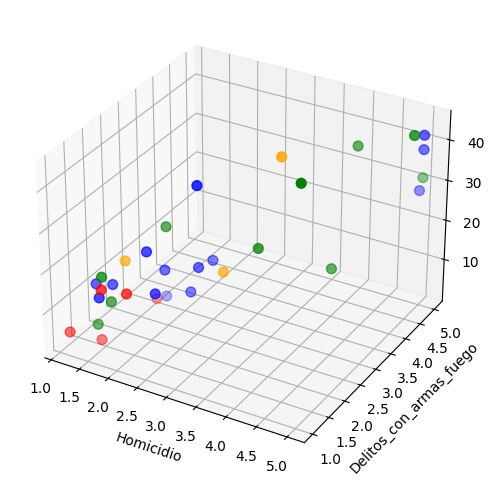

In [245]:
#Comparando los tres tipos de delitos

#%matplotlib notebook
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure(figsize=(8, 6))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

x = df2['Homicidio']
y = df2['Delitos_con_armas_fuego']
z = df2['porcen_pib']
colors = df2['cluster']
cmap = matplotlib.colors.ListedColormap(['blue','green','orange','red'])
g=ax.scatter(x, y, z, s=50,  c =  colors  , cmap=cmap  )

ax.set_xlabel('Homicidio')
ax.set_ylabel('Delitos_con_armas_fuego')
ax.set_zlabel('porcen_pib')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
#ax.view_init(elev=20, azim=35, roll=0)


plt.show()

In [246]:
df_id=pd.read_csv('/content/drive/My Drive/Ciencia de datos/CD_17_ML_DelitosMexico/datos/estados_id.csv')
df_id.head()

,ENTIDAD,IDNAME
0,Aguascalientes,AS
1,Baja California,BC
2,Baja California Sur,BS
3,Campeche,CC
4,CDMX,DF


In [247]:
cdmx=df2.iloc[14]
edomex=df2.iloc[13]
df2=df2.drop([13,14])
df2 = pd.concat([df2.iloc[:4], cdmx.to_frame().T, df2.iloc[4:9],edomex.to_frame().T, df2.iloc[9:]])
df2 = df2.reset_index(drop=True)

In [248]:
df2_map  = pd.concat([df2,df_id], axis=1)
df2_map

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib,cluster,ENTIDAD,IDNAME
0,AGUASCALIENTES,1.368,3.167,1.49,3.425,1.307,51.9,36158,14.5,1,Aguascalientes,AS
1,BAJA_CALIFORNIA,5.0,3.296,5.0,5.0,2.11,259.6,71413,31.5,2,Baja California,BC
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.0,1.496,28.8,35761,13.4,1,Baja California Sur,BS
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,21543,2.2,4,Campeche,CC
4,JALISCO,3.008,2.916,2.433,2.589,1.822,323.5,38466,17.7,3,CDMX,DF
5,CIUDAD_DE_MÉXICO,1.933,4.107,2.285,2.378,1.479,400.0,44355,7.3,4,Chiapas,CS
6,CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,13742,17.8,2,Chihuahua,CH
7,CHIHUAHUA,5.0,2.641,4.894,3.29,1.785,233.9,61538,29.0,1,Coahuila,CL
8,COAHUILA,1.495,2.274,1.312,3.204,1.766,59.0,18344,6.2,2,Colima,CM
9,COLIMA,5.0,3.344,5.0,4.224,1.418,61.2,77957,38.4,1,Durango,DG


In [249]:
df2_map.dtypes

Estados                                         object
Homicidio                                       object
Delitos_con_violencia                           object
Delitos_con_armas_fuego                         object
Delincuencia_organizada                         object
Carcel_Sin_sentencia                            object
Impacto_economico_de_la_violencia               object
Impacto_economico_per_capita_de_la_violencia    object
porcen_pib                                      object
cluster                                         object
ENTIDAD                                         object
IDNAME                                          object
dtype: object

In [250]:
df2_map[['Homicidio', 'Delitos_con_violencia',
       'Delitos_con_armas_fuego', 'Delincuencia_organizada',
       'Carcel_Sin_sentencia', 'Impacto_economico_de_la_violencia',
       'Impacto_economico_per_capita_de_la_violencia', 'porcen_pib']]=df2_map[['Homicidio', 'Delitos_con_violencia',
       'Delitos_con_armas_fuego', 'Delincuencia_organizada',
       'Carcel_Sin_sentencia', 'Impacto_economico_de_la_violencia',
       'Impacto_economico_per_capita_de_la_violencia', 'porcen_pib']].astype(float)

In [251]:
df2_map['cluster']=df2_map['cluster'].astype(int)

In [252]:
df2_map.dtypes

Estados                                          object
Homicidio                                       float64
Delitos_con_violencia                           float64
Delitos_con_armas_fuego                         float64
Delincuencia_organizada                         float64
Carcel_Sin_sentencia                            float64
Impacto_economico_de_la_violencia               float64
Impacto_economico_per_capita_de_la_violencia    float64
porcen_pib                                      float64
cluster                                           int64
ENTIDAD                                          object
IDNAME                                           object
dtype: object

In [253]:
estados_geo2 = '/content/drive/My Drive/Ciencia de datos/CD_17_ML_DelitosMexico/datos/estadosGEO_mx.json'

In [254]:
# Librería Python que permite crear mapas interactivos
import folium
map2 = folium.Map(location=[23.854334723840473, -102.70996743234137], tiles='cartodbpositron',zoom_start=5)

In [255]:
folium.Choropleth(geo_data=estados_geo2, data=df2_map, # geo_path=country_geo, data=plot_data,
             columns=['IDNAME', 'cluster'],
             key_on='feature.id',
             fill_color='Paired', fill_opacity=0.9, line_opacity=0.9
                 ).add_to(map2)
display(map2)